# Flight delay Analysis and Prediction

# Problem Statement:
Air travel is becoming increasingly complex with multiple variables impacting the same. The flight delay is one of such variables impacts carrier, Airport, and passenger and may result in significant commercial loss or reputation loss to all the stakeholders and thus huge cost on the economy. Thus, prediction of delay is crucial not only from viewpoint of a customer from the time management perspective and carrier for retention of customer faith but also from Airport point of view for managing the traffic more efficiently to optimize the number of arriving flights by appropriate adjustment of schedules. The contribution of weather conditions has been identified to be a very important contributor to these delays.
The historical data containing scheduled departure and arrival times, date, origin, destination and also weather data is available and the data scientists can predict if the delay can happen or not using the flight data and aviation weather data for a specific flight.


# Objective:
Every single flight is observed as per their scheduled departure and arrival timestamps, to record the details of trips made, traffic conditions, etc. Flight details like Origin, destination, date of flight, scheduled departure and scheduled arrival timestamps etc. Weather stations data details like station id along with it’s linked AirportID, ground height etc. Hourly aviation weather conditions data also provided for 2 years etc. Origin, Destination details in-flight data can be mapped to the AirportID in other datasets.

# The Core objectives of this project are:
-> To predict the Flight that is it delayed or not by the help of Weather Hourly Data, Weather Hpd Data and All Station Data.

-> To  predict the Flight Analysis using Classification Algorithms.

-> Make suggestions to the business regarding features that have highest impact on the Flight Delay Norms.

# Data Description:

# We are considering Weather Hourly Data, Weather Hpd Data and All Station Data for Flight Delay Analysis.


# 1. Weather Hourly Data:
This data is provided for the period from 2004 to 2005 with the details like Origin,Destination,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection etc.


# 2. Weather Hpd Data:
Daily weather attributes like  temperature, wind, humidity, etc. are available from year 2004 to 2005.

# 3. All Stations Data:
WeatherStationID, GroundHeight, StationHeight, BarometerHeight, Latitude, Longitude  is given for every year from 2004 to 2005.

# Importing Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
pd.options.display.float_format = '{:.0f}'.format
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.chdir('//home//2395B49//PHD_ML')

In [3]:
##Reading Hourly Weather Conditions Data:
#Reading the Weather hpd data:

os.chdir("//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974//weather_condition_data//weather_hourly")

weather_hourly_data = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',

                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

                                 for f in os.listdir('//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974//weather_condition_data//weather_hourly')], ignore_index = True)

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
weather_hourly_data.shape

(11516906, 12)

In [5]:
weather_hourly_data.isnull().sum()

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               296341
Visibility                  274803
DBT                        2262500
DewPointTemp               2288896
RelativeHumidityPercent    2295589
WindSpeed                    65941
WindDirection                65982
WindGustValue                85796
StationPressure            1435436
dtype: int64

In [6]:
weather_hourly_data.dtypes

WeatherStationID             int64
YearMonthDay                object
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [7]:
weather_hourly_data.head(11)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30,7,38,0,000,0,30
1,3035,20040101,10,SCT110,10SM,43,18,37,0,000,0,30
2,3039,20040101,10,OVC002,0.25SM,14,12,92,0,000,0,30
3,3040,20040101,10,CLR,10SM,30,21,69,9,250,0,30
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,nan,nan,nan,0,000,0,30
5,4876,20040101,10,CLR,10SM,21,19,92,0,000,0,30
6,4901,20040101,10,CLR,10SM,28,18,66,4,110,0,30
7,4924,20040101,10,CLR,10SM,32,21,64,7,120,0,30
8,4935,20040101,10,CLR,10SM,30,18,61,0,000,0,30
9,4957,20040101,10,CLR,10SM,32,12,43,10,160,0,30


In [8]:
##Reading Hpd Weather Conditions Data:
#Reading the Weather hpd data:

os.chdir("//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974//weather_condition_data//weather_hpd")

weather_hpd_data = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',

                      na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

                                 for f in os.listdir('//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974//weather_condition_data//weather_hpd')], ignore_index = True)

In [9]:
weather_hpd_data.shape

(12107407, 4)

In [10]:
weather_hpd_data.isnull().sum()

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        395160
dtype: int64

In [11]:
weather_hpd_data.dtypes

WeatherStationID      int64
YearMonthDay          int64
Time                  int64
HourlyPrecip        float64
dtype: object

In [12]:
weather_hpd_data.head(11)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0
1,3035,20040101,10,0
2,3039,20040101,10,0
3,3040,20040101,10,0
4,4128,20040101,10,0
5,4876,20040101,10,0
6,4901,20040101,10,0
7,4924,20040101,10,0
8,4935,20040101,10,0
9,4957,20040101,10,0


In [13]:
print(weather_hpd_data.shape)

(12107407, 4)


In [14]:
##Checking Weather Hourly and Hpd Unique in StationID counts:
print(len(weather_hpd_data.WeatherStationID.unique()))
print(len(weather_hourly_data.WeatherStationID.unique()))

1703
1706


In [15]:
weather_hpd_data.tail()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
12107402,14610,20051130,2358,0
12107403,40504,20051130,2358,0
12107404,40309,20051130,2359,0
12107405,93167,20051130,2359,0
12107406,94950,20051130,2359,0


In [16]:
weather_hourly_data.tail()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
11516901,64752,20051130,959,CLR,10SM,54,45,72,8,300,0,30
11516902,93167,20051130,959,CLR,10SM,51,19,28,0,000,0,27
11516903,93735,20051130,959,FEW080,7SM,nan,nan,nan,4,330,0,30
11516904,94705,20051130,959,BKN003 OVC015,3SM,nan,nan,nan,6,300,0,nan
11516905,94950,20051130,959,OVC070,10SM,19,14,81,0,000,0,29


# Merging Hourly Data and Hpd Data:

In [17]:
weather_data = pd.merge(weather_hourly_data,weather_hpd_data,how='left', left_on=['WeatherStationID','YearMonthDay','Time'], right_on = ['WeatherStationID','YearMonthDay','Time'])

In [18]:
print(weather_data.shape)
print(weather_data.tail())

(11516906, 13)
          WeatherStationID YearMonthDay  Time  SkyConditions Visibility  DBT  \
11516901             64752     20051130   959            CLR       10SM   54   
11516902             93167     20051130   959            CLR       10SM   51   
11516903             93735     20051130   959         FEW080        7SM  nan   
11516904             94705     20051130   959  BKN003 OVC015        3SM  nan   
11516905             94950     20051130   959         OVC070       10SM   19   

          DewPointTemp  RelativeHumidityPercent WindSpeed WindDirection  \
11516901            45                       72         8           300   
11516902            19                       28         0           000   
11516903           nan                      nan         4           330   
11516904           nan                      nan         6           300   
11516905            14                       81         0           000   

          WindGustValue  StationPressure  HourlyPreci

In [19]:
print(weather_data.shape)

(11516906, 13)


In [20]:
print(weather_data.isnull().sum())

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               296341
Visibility                  274803
DBT                        2262500
DewPointTemp               2288896
RelativeHumidityPercent    2295589
WindSpeed                    65941
WindDirection                65982
WindGustValue                85796
StationPressure            1435436
HourlyPrecip               1815002
dtype: int64


# Reading All Stations Data:

In [21]:
os.chdir('//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974')

In [22]:
all_station_data=pd.read_csv("AllStationsData_PHD.txt",delimiter="|")

In [23]:
print(all_station_data.head(11))

    WeatherStationID AirportID  GroundHeight  StationHeight  BarometerHeight  \
0               3011       TEX             0              0                0   
1               3012       SKX             0              0                0   
2               3013       LAA          3683           3703             3675   
3               3014       4SL             0           6909                0   
4               3016       RIL          5503           5544             5506   
5               3017       DEN          5379           5431             5382   
6               3024       BGD          3038           3054             3041   
7               3026       ITR          4195           4217             4198   
8               3027       CQC          7089           7086             7092   
9               3028       SPD          4383           4380             4386   
10              3029       RQE          6742           6739             6745   

    Latitude  Longitude TimeZone  
0   

In [24]:
print(all_station_data.shape)
print(type(all_station_data))

(1744, 8)
<class 'pandas.core.frame.DataFrame'>


In [25]:
print(all_station_data.dtypes)

WeatherStationID      int64
AirportID            object
GroundHeight          int64
StationHeight         int64
BarometerHeight       int64
Latitude            float64
Longitude           float64
TimeZone             object
dtype: object


In [26]:
all_station_data.describe()

,WeatherStationID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude
count,1744,1744,1744,1744,1744,1744
mean,37302,681,925,683,40,-96
std,33240,1387,1516,1388,9,32
min,3011,-119,-117,-116,7,-177
25%,12919,0,7,0,34,-108
50%,24031,24,282,30,39,-93
75%,54822,713,1024,716,43,-83
max,96402,9935,9927,9938,71,174


In [27]:
all_station_data.isnull().sum()

WeatherStationID    0
AirportID           0
GroundHeight        0
StationHeight       0
BarometerHeight     0
Latitude            0
Longitude           0
TimeZone            0
dtype: int64

In [28]:
print(all_station_data.dtypes)

WeatherStationID      int64
AirportID            object
GroundHeight          int64
StationHeight         int64
BarometerHeight       int64
Latitude            float64
Longitude           float64
TimeZone             object
dtype: object


In [29]:
print(all_station_data.shape)
print(type(all_station_data))

(1744, 8)
<class 'pandas.core.frame.DataFrame'>


# Now Merging All Stations Data with Weather Data:

In [30]:
station_data = pd.merge(all_station_data,weather_data,how="left",left_on=["WeatherStationID"],right_on=["WeatherStationID"])

In [31]:
station_data.isnull().sum()

WeatherStationID                 0
AirportID                        0
GroundHeight                     0
StationHeight                    0
BarometerHeight                  0
Latitude                         0
Longitude                        0
TimeZone                         0
YearMonthDay                    42
Time                            42
SkyConditions               296378
Visibility                  274840
DBT                        2259059
DewPointTemp               2285455
RelativeHumidityPercent    2292148
WindSpeed                    65975
WindDirection                66018
WindGustValue                85830
StationPressure            1435475
HourlyPrecip               1815044
dtype: int64

In [32]:
station_data.head(7)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,FEW075 BKN090,10SM,32,10,40,15,160,0,30,0
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,BKN028 OVC033,10SM,21,14,74,5,VRB,0,30,0
2,3011,TEX,0,0,0,38,-108,+7,20040101,2010,FEW025 OVC032,9SM,25,18,75,4,VRB,0,30,0
3,3011,TEX,0,0,0,38,-108,+7,20040102,1010,SCT015 BKN020 OVC028,4SM,25,23,92,0,000,0,30,0
4,3011,TEX,0,0,0,38,-108,+7,20040102,1050,BKN013 OVC021,1.75SM,27,23,85,0,000,0,30,0
5,3011,TEX,0,0,0,38,-108,+7,20040102,1110,OVC011,1.25SM,28,27,96,0,000,0,30,0
6,3011,TEX,0,0,0,38,-108,+7,20040102,1310,SCT021 OVC030,7SM,28,25,89,0,000,0,30,0


In [33]:
station_data.dtypes

WeatherStationID             int64
AirportID                   object
GroundHeight                 int64
StationHeight                int64
BarometerHeight              int64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                object
Time                       float64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

In [34]:
station_data.shape

(11513465, 20)

In [35]:
#Replacing missing unique by near NaN:
station_data.YearMonthDay[10590609] = "NaN"

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
#Separate year month and date
station_data['date_'] =  pd.to_datetime(station_data['YearMonthDay'], format='%Y%m%d')
station_data['date_']= station_data.date_.astype(str)

In [37]:
#convert to string:
station_data["Time"] = station_data["Time"].astype(str)

In [38]:
#calculate hours from time:
station_data["Time"] = station_data["Time"].astype(str)
station_data.Time= pd.to_numeric(station_data.Time, errors='coerce')
station_data['hours'] =station_data.Time.fillna(9999).astype(int)
station_data['hours']= station_data['hours'].astype(str)

In [39]:
length = 3
fill = '0'
station_data['hours'] = station_data["hours"].str.ljust(length,fill)
station_data['hours'] = station_data["hours"].str.rjust(4,"0")
station_data["hours_only"] = station_data["hours"].str[:2]

In [185]:
station_data.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
WeatherStationID,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,...,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
AirportID,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX,...,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX,TEX
GroundHeight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
StationHeight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BarometerHeight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latitude,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
Longitude,-108,-108,-108,-108,-108,-108,-108,-108,-108,-108,...,-108,-108,-108,-108,-108,-108,-108,-108,-108,-108
TimeZone,+7,+7,+7,+7,+7,+7,+7,+7,+7,+7,...,+7,+7,+7,+7,+7,+7,+7,+7,+7,+7
YearMonthDay,20040101,20040101,20040101,20040102,20040102,20040102,20040102,20040102,20040102,20040102,...,20040512,20040512,20040512,20040512,20040512,20040512,20040512,20040512,20040512,20040512
Time,1350,1910,2010,1010,1050,1110,1310,1330,2250,410,...,1430,1450,1510,1530,1550,1610,1630,1650,1710,1730


# Now Reading Flight Train Dataset:

In [40]:
os.chdir('//home//2395B49//PHD_ML')

In [41]:
flight_train=pd.read_csv('FlightDelay_Train-1550042794911.csv',na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

In [42]:
flight_train.head(3)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02


In [43]:
flight_train.dtypes

FlightNumber              object
Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
dtype: object

In [44]:
flight_train.count()

FlightNumber              7861
Year                      7861
Month                     7861
DayofMonth                7861
DayOfWeek                 7861
ScheduledDepTime          7861
ScheduledArrTime          7861
ScheduledTravelTime       7861
Origin                    7861
Destination               7861
Distance                  7861
ActualArrivalTimeStamp    7861
dtype: int64

In [45]:
flight_train.shape

(7861, 12)

In [46]:
flight_train.describe()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance
count,7861,7861,7861,7861,7861,7861,7861,7861
mean,2004,7,15,4,1198,1412,130,744
std,0,3,9,2,355,370,63,523
min,2004,1,1,1,215,553,61,69
25%,2004,5,7,2,900,1111,83,368
50%,2004,7,15,4,1215,1430,112,595
75%,2004,9,23,6,1518,1728,155,951
max,2004,11,31,7,1800,2300,562,4962


In [47]:
# Finding Categorical & Numerical variables in the Data
categorical = [var for var in flight_train.columns if flight_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 4 categorical variables


In [48]:
numerical = [var for var in flight_train.columns if flight_train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 8 numerical variables


In [49]:
###Finding the Null Values
flight_train.isnull().sum()

FlightNumber              0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
ScheduledDepTime          0
ScheduledArrTime          0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
ActualArrivalTimeStamp    0
dtype: int64

In [50]:
flight_train["New_Date"] = flight_train["DayofMonth"].map(str)+"-"+flight_train["Month"].map(str)+"-"+flight_train["Year"].map(str)

In [51]:
#Add new column and remove old column and do conversions:
flight_train["Day"]=flight_train["DayofMonth"]
flight_train = flight_train.drop(["DayofMonth"],axis=1)
flight_train["Date"]=pd.to_datetime(flight_train[["Day","Month","Year"]])
flight_train['Date']= flight_train.Date.astype(str)

In [52]:
#calculate hours from time:
flight_train.Time= pd.to_numeric(flight_train.ScheduledDepTime, errors='coerce')
flight_train['hours'] =flight_train.Time.fillna(9999).astype(int)
flight_train['hours']= flight_train['hours'].astype(str)
flight_train['hours']= flight_train['hours'].astype(str)

In [53]:
length = 3
fill = '0'
flight_train['hours']= flight_train["hours"].str.ljust(length,fill)
flight_train['hours'] = flight_train["hours"].str.rjust(4,"0")
flight_train["hours_only"] = flight_train["hours"].str[:2]

In [54]:
flight_train.head(11)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,New_Date,Day,Date,hours,hours_only
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54,20-9-2004,20,2004-09-20,1000,10
1,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55,19-11-2004,19,2004-11-19,1440,14
2,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02,4-5-2004,4,2004-05-04,1800,18
3,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33,6-7-2004,6,2004-07-06,1400,14
4,MSP_ORD_44884,2004,9,4,830,946,76,MSP,ORD,334,23/09/04 09:46,23-9-2004,23,2004-09-23,0830,08
5,CVG_GRR_45655,2004,9,7,1730,1832,62,CVG,GRR,268,26/09/04 18:32,26-9-2004,26,2004-09-26,1730,17
6,DFW_STL_53369,2004,5,3,1330,1517,107,DFW,STL,551,05/05/04 15:17,5-5-2004,5,2004-05-05,1330,13
7,ACV_SFO_50785,2004,9,3,655,758,63,ACV,SFO,250,15/09/04 07:58,15-9-2004,15,2004-09-15,0655,06
8,BHM_DFW_34260,2004,5,5,1425,1625,120,BHM,DFW,597,28/05/04 18:39,28-5-2004,28,2004-05-28,1425,14
9,DFW_PIT_33678,2004,9,6,847,1223,156,DFW,PIT,1068,11/09/04 12:23,11-9-2004,11,2004-09-11,0847,08


In [55]:
flight_train.dtypes

FlightNumber              object
Year                       int64
Month                      int64
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
New_Date                  object
Day                        int64
Date                      object
hours                     object
hours_only                object
dtype: object

In [56]:
flight_train.isnull().sum()

FlightNumber              0
Year                      0
Month                     0
DayOfWeek                 0
ScheduledDepTime          0
ScheduledArrTime          0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
ActualArrivalTimeStamp    0
New_Date                  0
Day                       0
Date                      0
hours                     0
hours_only                0
dtype: int64

# Now Merge Station Data with Flight Train Data by the common Attributes like Origin,Date,Hours: 

In [57]:
final_train_1= pd.merge(flight_train,station_data,how="left",left_on=["Origin","Date","hours_only"],right_on=["AirportID","date_","hours_only"])

In [58]:
print(final_train_1.shape)

(10289, 38)


In [59]:
final_train_2=final_train_1.drop_duplicates(subset='FlightNumber',keep='last')

In [60]:
final_train_2.shape

(7861, 38)

In [61]:
#Now for arrival time and destination:

final_train_2.Time= pd.to_numeric(final_train_2.ScheduledArrTime, errors='coerce')
final_train_2['hours_1'] =final_train_2.Time.fillna(9999).astype(int)
final_train_2['hours_1']= final_train_2['hours_1'].astype(str)
final_train_2['hours_1']= final_train_2['hours_1'].astype(str)
length = 3
fill = '0'
final_train_2['hours_1']= final_train_2["hours_1"].str.ljust(length,fill)
final_train_2['hours_1'] = final_train_2["hours_1"].str.rjust(4,"0")
final_train_2["hours_1"] = final_train_2["hours_1"].str[:2]

/usr/lib64/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [195]:
final_train_2.dtypes

FlightNumber                object
Year                         int64
Month                        int64
DayOfWeek                    int64
ScheduledDepTime             int64
ScheduledArrTime             int64
ScheduledTravelTime          int64
Origin                      object
Destination                 object
Distance                     int64
ActualArrivalTimeStamp      object
New_Date                    object
Day                          int64
Date                        object
hours_x                     object
hours_only                  object
WeatherStationID           float64
AirportID                   object
GroundHeight               float64
StationHeight              float64
BarometerHeight            float64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                object
Time                         int64
SkyConditions               object
Visibility                  object
DBT                 

In [63]:
final_train_2.shape

(7861, 39)

In [64]:
station_data.head(7)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,...,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,date_,hours,hours_only
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,...,10,40,15,160,0,30,0,2004-01-01,1350,13
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,...,14,74,5,VRB,0,30,0,2004-01-01,1910,19
2,3011,TEX,0,0,0,38,-108,+7,20040101,2010,...,18,75,4,VRB,0,30,0,2004-01-01,2010,20
3,3011,TEX,0,0,0,38,-108,+7,20040102,1010,...,23,92,0,000,0,30,0,2004-01-02,1010,10
4,3011,TEX,0,0,0,38,-108,+7,20040102,1050,...,23,85,0,000,0,30,0,2004-01-02,1050,10
5,3011,TEX,0,0,0,38,-108,+7,20040102,1110,...,27,96,0,000,0,30,0,2004-01-02,1110,11
6,3011,TEX,0,0,0,38,-108,+7,20040102,1310,...,25,89,0,000,0,30,0,2004-01-02,1310,13


In [65]:
station_data_new=station_data.copy()

In [66]:
#Change column names to pull again Weather Data for Destination:

station_data_new.columns=['WeatherStationID_new','AirportID_new','GroundHeight_new','StationHeight_new','BarometerHeight_new','Latitude_new','Longitude_new','TimeZone_new','YearMonthDay_new','Time_new','SkyConditions_new','Visibility_new','DBT_new','DewPointTemp_new','RelativeHumidityPercent_new','WindSpeed_new','WindDirection_new','WindGustValue_new','StationPressure_new','HourlyPrecip_new','Date_new','hours_new','hours_only_new']

# Now Merge Station Data with Flight Train Data by the common Attributes like Destination,Date,Hours:

In [67]:
final_train_new = pd.merge(final_train_2,station_data_new,how="left",left_on=["Destination","Date","hours_1"],right_on=["AirportID_new","Date_new","hours_only_new"])

In [68]:
final_train_new.shape

(9426, 62)

In [69]:
final_train_new.head(7)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,DewPointTemp_new,RelativeHumidityPercent_new,WindSpeed_new,WindDirection_new,WindGustValue_new,StationPressure_new,HourlyPrecip_new,Date_new,hours_new,hours_only_new
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,35,27,8,190,0,29,0,2004-09-20,1151,11
1,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,nan,nan,5,160,0,nan,nan,2004-11-19,1636,16
2,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,nan,nan,6,150,0,nan,nan,2004-11-19,1644,16
3,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,58,93,6,150,0,29,nan,2004-11-19,1651,16
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,nan,nan,9,150,0,nan,nan,2004-11-19,1658,16
5,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,...,25,10,8,190,0,28,0,2004-05-04,1956,19
6,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,...,nan,nan,8,280,0,nan,nan,2004-07-06,1520,15


In [70]:
final_train_new_1=final_train_new.drop_duplicates(subset='FlightNumber',keep='last')

In [71]:
final_train_new_1.shape

(7861, 62)

In [72]:
final_train_new_1.columns

Index([               u'FlightNumber',                        u'Year',
                             u'Month',                   u'DayOfWeek',
                  u'ScheduledDepTime',            u'ScheduledArrTime',
               u'ScheduledTravelTime',                      u'Origin',
                       u'Destination',                    u'Distance',
            u'ActualArrivalTimeStamp',                    u'New_Date',
                               u'Day',                        u'Date',
                           u'hours_x',                  u'hours_only',
                  u'WeatherStationID',                   u'AirportID',
                      u'GroundHeight',               u'StationHeight',
                   u'BarometerHeight',                    u'Latitude',
                         u'Longitude',                    u'TimeZone',
                      u'YearMonthDay',                        u'Time',
                     u'SkyConditions',                  u'Visibility',
      

In [73]:
final_train_new_2 = final_train_new_1.copy()

In [74]:
final_train_new_2.shape

(7861, 62)

In [75]:
#Calculate target from date and time of actual and schedual arrival
import datetime as dt
final_train_new_2["new_date"] = final_train_new_2["Day"].map(str)+"-"+final_train_new_2["Month"].map(str)+"-"+final_train_new_2["Year"].map(str)
final_train_new_2['Scheduled_arrival']=pd.to_datetime(final_train_new_2['ScheduledArrTime'],format='%H%M').dt.strftime('%H:%M')
final_train_new_2["Actual_ArrivalTime"] = final_train_new_2["new_date"] +" " + final_train_new_2["Scheduled_arrival"]
final_train_new_2['ActualArrivalTimeStamp']=final_train_new_2['ActualArrivalTimeStamp'].str.replace("/","-")
final_train_new_2['ActualArrivalTimeStamp']=pd.to_datetime(final_train_new_2['ActualArrivalTimeStamp'])
final_train_new_2['Actual_ArrivalTime']=pd.to_datetime(final_train_new_2['Actual_ArrivalTime'])
final_train_new_2['ActualArrivalTimeStamp2']=[d.date() for d in final_train_new_2['ActualArrivalTimeStamp']]
final_train_new_2['Actual_ArrivalTime2']=[d.date() for d in final_train_new_2['Actual_ArrivalTime']]

In [76]:
final_train_new_2["FlightDelay_new"] = final_train_new_2["ActualArrivalTimeStamp2"] - final_train_new_2["Actual_ArrivalTime2"]
final_train_new_2.head(7)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,HourlyPrecip_new,Date_new,hours_new,hours_only_new,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay_new
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,0,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,nan,2004-11-19,1658,16,19-11-2004,16:34,2004-11-19 16:34:00,2004-11-19,2004-11-19,0 days
5,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,...,0,2004-05-04,1956,19,4-5-2004,19:02,2004-04-05 19:02:00,2004-04-05,2004-04-05,0 days
7,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,...,0,2004-07-06,1553,15,6-7-2004,15:33,2004-06-07 15:33:00,2004-06-07,2004-06-07,0 days
8,MSP_ORD_44884,2004,9,4,830,946,76,MSP,ORD,334,...,0,2004-09-23,0956,09,23-9-2004,09:46,2004-09-23 09:46:00,2004-09-23,2004-09-23,0 days
9,CVG_GRR_45655,2004,9,7,1730,1832,62,CVG,GRR,268,...,0,2004-09-26,1856,18,26-9-2004,18:32,2004-09-26 18:32:00,2004-09-26,2004-09-26,0 days
10,DFW_STL_53369,2004,5,3,1330,1517,107,DFW,STL,551,...,0,2004-05-05,1551,15,5-5-2004,15:17,2004-05-05 15:17:00,2004-05-05,2004-05-05,0 days


In [77]:
final_train_new_2.FlightDelay_new.value_counts()

0 days    7856
1 days       5
Name: FlightDelay_new, dtype: int64

In [78]:
final_train_new_2=final_train_new_2.drop(final_train_new_2[final_train_new_2.FlightDelay_new == '1 days'].index)

In [79]:
final_train_new_2.FlightDelay_new.value_counts()

0 days    7856
Name: FlightDelay_new, dtype: int64

In [80]:
final_train_new_2["FlightDelay"] = final_train_new_2["ActualArrivalTimeStamp"] - final_train_new_2["Actual_ArrivalTime"]
final_train_new_2['FlightDelay']=pd.to_datetime(final_train_new_2['FlightDelay'])
final_train_new_2['FlightDelay']=pd.to_datetime(final_train_new_2['FlightDelay'],format='%H%M').dt.strftime('%H:%M')
final_train_new_2.head(7)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,Date_new,hours_new,hours_only_new,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay_new,FlightDelay
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days,00:00
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,2004-11-19,1658,16,19-11-2004,16:34,2004-11-19 16:34:00,2004-11-19,2004-11-19,0 days,02:21
5,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,...,2004-05-04,1956,19,4-5-2004,19:02,2004-04-05 19:02:00,2004-04-05,2004-04-05,0 days,00:00
7,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,...,2004-07-06,1553,15,6-7-2004,15:33,2004-06-07 15:33:00,2004-06-07,2004-06-07,0 days,00:00
8,MSP_ORD_44884,2004,9,4,830,946,76,MSP,ORD,334,...,2004-09-23,0956,09,23-9-2004,09:46,2004-09-23 09:46:00,2004-09-23,2004-09-23,0 days,00:00
9,CVG_GRR_45655,2004,9,7,1730,1832,62,CVG,GRR,268,...,2004-09-26,1856,18,26-9-2004,18:32,2004-09-26 18:32:00,2004-09-26,2004-09-26,0 days,00:00
10,DFW_STL_53369,2004,5,3,1330,1517,107,DFW,STL,551,...,2004-05-05,1551,15,5-5-2004,15:17,2004-05-05 15:17:00,2004-05-05,2004-05-05,0 days,00:00


In [81]:
final_train_new_2['FlightDelay']=final_train_new_2['FlightDelay'].str.replace(":","")
final_train_new_2['FlightDelay']=final_train_new_2['FlightDelay'].astype('int64')
final_train_new_2['FlightDelay']=final_train_new_2['FlightDelay'].apply(lambda x: '1' if x>= 15 else '2')

In [82]:
final_train_new_2.head(7)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,Date_new,hours_new,hours_only_new,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay_new,FlightDelay
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days,2
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,2004-11-19,1658,16,19-11-2004,16:34,2004-11-19 16:34:00,2004-11-19,2004-11-19,0 days,1
5,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,...,2004-05-04,1956,19,4-5-2004,19:02,2004-04-05 19:02:00,2004-04-05,2004-04-05,0 days,2
7,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,...,2004-07-06,1553,15,6-7-2004,15:33,2004-06-07 15:33:00,2004-06-07,2004-06-07,0 days,2
8,MSP_ORD_44884,2004,9,4,830,946,76,MSP,ORD,334,...,2004-09-23,0956,09,23-9-2004,09:46,2004-09-23 09:46:00,2004-09-23,2004-09-23,0 days,2
9,CVG_GRR_45655,2004,9,7,1730,1832,62,CVG,GRR,268,...,2004-09-26,1856,18,26-9-2004,18:32,2004-09-26 18:32:00,2004-09-26,2004-09-26,0 days,2
10,DFW_STL_53369,2004,5,3,1330,1517,107,DFW,STL,551,...,2004-05-05,1551,15,5-5-2004,15:17,2004-05-05 15:17:00,2004-05-05,2004-05-05,0 days,2


In [83]:
final_train_new_2.FlightDelay.value_counts()

2    6342
1    1514
Name: FlightDelay, dtype: int64

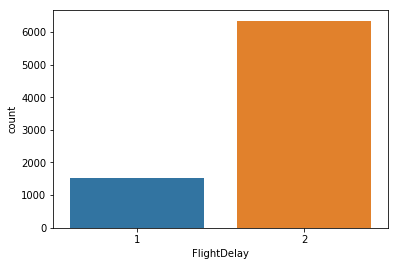

In [84]:
sns.countplot(x='FlightDelay',data=final_train_new_2)

In [85]:
#Checking the Target in Percentages:
(final_train_new_2.FlightDelay.value_counts()/sum(final_train_new_2.FlightDelay.value_counts()))*100

2   81
1   19
Name: FlightDelay, dtype: float64

In [86]:
final_train_new_2.shape

(7856, 69)

In [87]:
final_train_new_2.columns

Index([               u'FlightNumber',                        u'Year',
                             u'Month',                   u'DayOfWeek',
                  u'ScheduledDepTime',            u'ScheduledArrTime',
               u'ScheduledTravelTime',                      u'Origin',
                       u'Destination',                    u'Distance',
            u'ActualArrivalTimeStamp',                    u'New_Date',
                               u'Day',                        u'Date',
                           u'hours_x',                  u'hours_only',
                  u'WeatherStationID',                   u'AirportID',
                      u'GroundHeight',               u'StationHeight',
                   u'BarometerHeight',                    u'Latitude',
                         u'Longitude',                    u'TimeZone',
                      u'YearMonthDay',                        u'Time',
                     u'SkyConditions',                  u'Visibility',
      

In [88]:
final_train_new_2.dtypes

FlightNumber                            object
Year                                     int64
Month                                    int64
DayOfWeek                                int64
ScheduledDepTime                         int64
ScheduledArrTime                         int64
ScheduledTravelTime                      int64
Origin                                  object
Destination                             object
Distance                                 int64
ActualArrivalTimeStamp          datetime64[ns]
New_Date                                object
Day                                      int64
Date                                    object
hours_x                                 object
hours_only                              object
WeatherStationID                       float64
AirportID                               object
GroundHeight                           float64
StationHeight                          float64
BarometerHeight                        float64
Latitude     

# Visualizations:

 None]

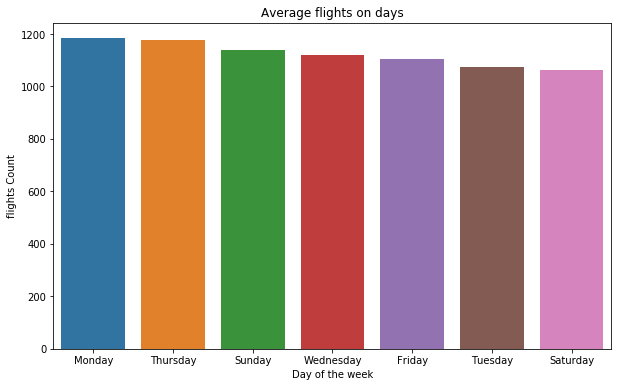

In [89]:
#Day of the week vs Flight Count:
import calendar
fig,(ax2)= plt.subplots(nrows=1)

fig.set_size_inches(10,6)

final_train_new_2['DayOfWeek'] = final_train_new_2['Actual_ArrivalTime'].dt.weekday_name
DayOfWeek_frequency = final_train_new_2.DayOfWeek.value_counts().reset_index()
DayOfWeek_frequency.columns = ['DayOfWeek','frequency']
sns.barplot(x='DayOfWeek',y='frequency',data=DayOfWeek_frequency,ax=ax2)
ax2.set(xlabel='Day of the week', ylabel='flights Count',title="Average flights on days",label='big')

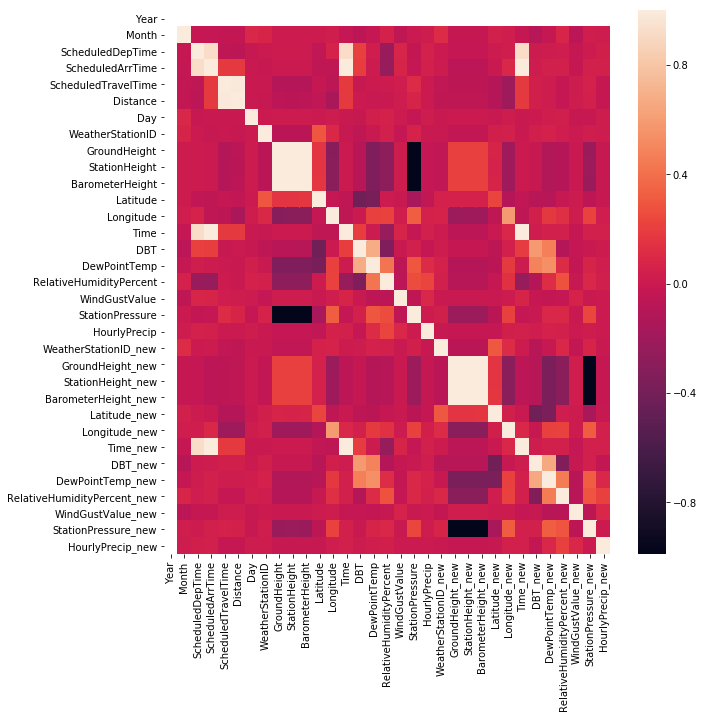

In [90]:
plt.figure(figsize = (10,10))
sns.heatmap(final_train_new_2.corr())
plt.show()

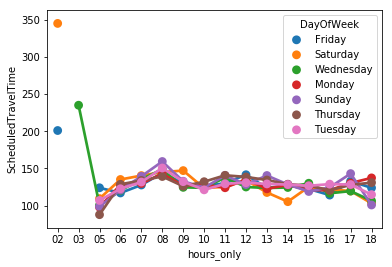

In [91]:
#Flight Delay hour wise:
#air time of every  hour and week of the data
hourAggregated = pd.DataFrame(final_train_new_2.groupby(["hours_only","DayOfWeek"])["ScheduledTravelTime"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hours_only"], y=hourAggregated["ScheduledTravelTime"],hue=hourAggregated["DayOfWeek"], data=hourAggregated)

In [98]:
final_train_new_2['FlightDelay'] = final_train_new_2['FlightDelay'].astype('int64')

/usr/lib64/python2.7/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


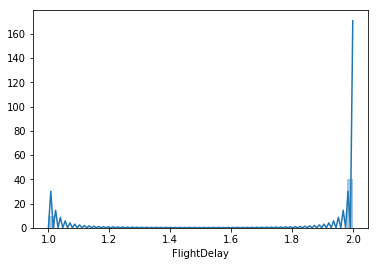

In [99]:
##Flight Delay in Minutes:
#histogram
sns.distplot(final_train_new_2['FlightDelay'])
plt.show()

In [100]:
#Dropping Unnecessary columns:
drop_col=['FlightNumber','Year','Month','DayOfWeek','ScheduledDepTime','ScheduledArrTime','ScheduledTravelTime','ActualArrivalTimeStamp','Day','Date','hours_x','hours_only','WeatherStationID','AirportID','Latitude','Longitude','TimeZone','YearMonthDay','Time','hours_y','hours_1','hours_new','WeatherStationID_new','AirportID_new','Latitude_new','Longitude_new','TimeZone_new','YearMonthDay_new','Time_new','Date_new','hours_1','hours_only_new','new_date','Scheduled_arrival','Actual_ArrivalTime','ActualArrivalTimeStamp2','Actual_ArrivalTime2','FlightDelay_new']

In [101]:
final_flight_train=final_train_new_2.drop(drop_col,axis=1)

In [102]:
final_flight_train.shape

(7856, 32)

In [103]:
final_flight_train.columns

Index([                     u'Origin',                 u'Destination',
                          u'Distance',                    u'New_Date',
                      u'GroundHeight',               u'StationHeight',
                   u'BarometerHeight',               u'SkyConditions',
                        u'Visibility',                         u'DBT',
                      u'DewPointTemp',     u'RelativeHumidityPercent',
                         u'WindSpeed',               u'WindDirection',
                     u'WindGustValue',             u'StationPressure',
                      u'HourlyPrecip',                       u'date_',
                  u'GroundHeight_new',           u'StationHeight_new',
               u'BarometerHeight_new',           u'SkyConditions_new',
                    u'Visibility_new',                     u'DBT_new',
                  u'DewPointTemp_new', u'RelativeHumidityPercent_new',
                     u'WindSpeed_new',           u'WindDirection_new',
      

In [104]:
final_flight_train.isnull().sum()

Origin                           0
Destination                      0
Distance                         0
New_Date                         0
GroundHeight                    96
StationHeight                   96
BarometerHeight                 96
SkyConditions                  102
Visibility                     100
DBT                            214
DewPointTemp                   215
RelativeHumidityPercent        216
WindSpeed                       98
WindDirection                   98
WindGustValue                   98
StationPressure                209
HourlyPrecip                   725
date_                           96
GroundHeight_new                90
StationHeight_new               90
BarometerHeight_new             90
SkyConditions_new               93
Visibility_new                  93
DBT_new                        174
DewPointTemp_new               175
RelativeHumidityPercent_new    178
WindSpeed_new                   92
WindDirection_new               92
WindGustValue_new   

In [105]:
final_flight_train.head(11)

,Origin,Destination,Distance,New_Date,GroundHeight,StationHeight,BarometerHeight,SkyConditions,Visibility,DBT,...,Visibility_new,DBT_new,DewPointTemp_new,RelativeHumidityPercent_new,WindSpeed_new,WindDirection_new,WindGustValue_new,StationPressure_new,HourlyPrecip_new,FlightDelay
0,BOS,CLE,563,20-9-2004,19,30,180,CLR,10SM,63,...,10SM,71,35,27,8,190,0,29,0,2
4,CLE,ATL,554,19-11-2004,802,805,805,OVC022,6SM,53,...,2SM,nan,nan,nan,9,150,0,nan,nan,1
5,SNA,LAS,226,4-5-2004,49,55,52,CLR,7SM,69,...,10SM,89,25,10,8,190,0,28,0,2
7,CLT,TPA,508,6-7-2004,721,769,724,FEW045,10SM,90,...,10SM,88,76,68,7,010,0,30,0,2
8,MSP,ORD,334,23-9-2004,871,838,874,FEW065 SCT220 BKN250,10SM,68,...,10SM,79,55,44,8,200,0,29,0,2
9,CVG,GRR,268,26-9-2004,882,883,885,BKN250,10SM,72,...,10SM,65,45,49,3,020,0,29,0,2
10,DFW,STL,551,5-5-2004,559,596,562,CLR,10SM,80,...,10SM,80,60,51,6,220,0,29,0,2
11,ACV,SFO,250,15-9-2004,222,210,225,OVC013,10SM,58,...,9SM,68,55,63,0,000,0,30,0,2
12,BHM,DFW,597,28-5-2004,636,630,639,SCT022 BKN037 BKN090,10SM,74,...,10SM,90,56,32,5,VRB,0,29,0,1
13,DFW,PIT,1068,11-9-2004,559,596,562,FEW090 BKN300,10SM,79,...,10SM,74,56,54,5,070,0,29,0,2


In [106]:
final_flight_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Origin,7856,223,ATL,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,7856,215,ATL,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,7856,NaN,NaN,NaN,743,523,69,368,595,950,4962
New_Date,7856,157,24-11-2004,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GroundHeight,7760,NaN,NaN,NaN,810,1192,0,87,559,882,6674
StationHeight,7760,NaN,NaN,NaN,817,1202,0,68,596,883,6685
BarometerHeight,7760,NaN,NaN,NaN,816,1189,0,98,562,885,6677
SkyConditions,7754,3433,CLR,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,7756,20,10SM,5696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DBT,7642,NaN,NaN,NaN,68,15,8,58,70,79,109


In [107]:
final_flight_train['WindDirection_new'].value_counts

<bound method Series.value_counts of 0       190
4       150
5       190
7       010
8       200
9       020
10      220
11      000
12      VRB
13      070
15      290
16      090
18      340
19      200
20      180
21      000
22      180
23      190
24      230
25      290
27      060
29      030
30      100
31      100
32      000
33      060
34      190
35      120
36      070
37      170
       ... 
9389    000
9391    010
9392    230
9393    230
9394    VRB
9395    200
9399    090
9400    230
9401    150
9402    030
9403    100
9404    200
9407    000
9408    200
9409    240
9410    150
9411    050
9412    310
9413    150
9414    080
9415    340
9416    000
9417    230
9418    190
9419    340
9421    290
9422    120
9423    190
9424    NaN
9425    230
Name: WindDirection_new, Length: 7856, dtype: object>

In [108]:
train_dis = {
'GroundHeight'                    :    810,
'StationHeight'                   :    817,
'BarometerHeight'                 :    816,
'SkyConditions'                   :   'CLR',
'Visibility'                      :   '10',
'DBT'                             :    68,
'DewPointTemp'                    :    53,
'RelativeHumidityPercent'         :    63,
'WindSpeed'                       :     7,
'WindDirection'                   :  'VRB',
'WindGustValue'                   :     3,
'StationPressure'                 :    29,
'HourlyPrecip'                    :     0,
'GroundHeight_new'                :   838,
'StationHeight_new'               :   847,
'BarometerHeight_new'             :   844,
'SkyConditions_new'               :  'CLR',
'Visibility_new'                  :  '10SM',
'DBT_new'                         :    69,
'DewPointTemp_new'                :    53,
'RelativeHumidityPercent_new'     :    61,
'WindSpeed_new'                   :     6,
'WindDirection_new'               :  'VRB',
'WindGustValue_new'               :     3,
'StationPressure_new'             :    29,
'HourlyPrecip_new'                :     0,
}
final_flight_train = final_flight_train.fillna(train_dis)

In [109]:
final_flight_train['WindDirection']=final_flight_train['WindDirection'].str.replace("VRB","0")
final_flight_train['WindDirection1']=final_flight_train['WindDirection_new'].str.replace("VRB","0")

In [110]:
final_flight_train.dtypes

Origin                          object
Destination                     object
Distance                         int64
New_Date                        object
GroundHeight                   float64
StationHeight                  float64
BarometerHeight                float64
SkyConditions                   object
Visibility                      object
DBT                            float64
DewPointTemp                   float64
RelativeHumidityPercent        float64
WindSpeed                       object
WindDirection                   object
WindGustValue                  float64
StationPressure                float64
HourlyPrecip                   float64
date_                           object
GroundHeight_new               float64
StationHeight_new              float64
BarometerHeight_new            float64
SkyConditions_new               object
Visibility_new                  object
DBT_new                        float64
DewPointTemp_new               float64
RelativeHumidityPercent_n

In [111]:
final_flight_train.shape

(7856, 33)

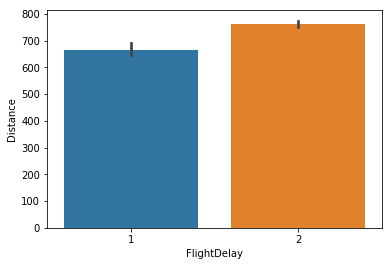

In [112]:
#Checking delay as per distance
sns.barplot(x='FlightDelay',y='Distance',data=final_flight_train)

In [113]:
final_flight_train.FlightDelay.value_counts()

2    6342
1    1514
Name: FlightDelay, dtype: int64

In [114]:
final_flight_train["Visibility"] = final_flight_train.Visibility.str.replace('[SM]', '')
final_flight_train["Visibility_new"] = final_flight_train.Visibility_new.str.replace('[SM]', '')

# Now Reading Flight Test Data: 

In [115]:
os.chdir('//home//2395B49//PHD_ML//Weatherdatatoconsider-1550046361974//FlightDelay_Test-1550632810992')

In [116]:
flight_test=pd.read_csv('FlightDelay_Test.csv',na_values="'', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?', '#'")

In [117]:
#Test data details 
print(flight_test.shape)
print(flight_test.isnull().sum(axis=0))
print(flight_test.columns)

(6566, 11)
FlightNumber           0
Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
ScheduledDepTime       0
ScheduledArrTime       0
ScheduledTravelTime    0
Origin                 0
Destination            0
Distance               0
dtype: int64
Index([u'FlightNumber', u'Year', u'Month', u'DayofMonth', u'DayOfWeek',
       u'ScheduledDepTime', u'ScheduledArrTime', u'ScheduledTravelTime',
       u'Origin', u'Destination', u'Distance'],
      dtype='object')


In [118]:
flight_test["Day"]=flight_test["DayofMonth"]
flight_test = flight_test.drop(["DayofMonth"],axis=1)
flight_test["Date"]=pd.to_datetime(flight_test[["Year","Month","Day"]])

In [119]:
flight_test['Date']= flight_test.Date.astype(str)
flight_test.Time= pd.to_numeric(flight_test.ScheduledDepTime, errors='coerce')
flight_test['hours'] =flight_test.Time.fillna(9999).astype(int)
flight_test['hours']= flight_test['hours'].astype(str)

In [120]:
length = 3
fill = '0'
flight_test['hours']= flight_test["hours"].str.ljust(length,fill)
flight_test['hours'] = flight_test["hours"].str.rjust(4,"0")
flight_test["Hours"] = flight_test["hours"].str[:2]

In [121]:
flight_test.head(11)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,Day,Date,hours,Hours
0,DEN_XNA_62349,2005,9,1,1516,1756,100,DEN,XNA,616,12,2005-09-12,1516,15
1,RIC_EWR_87213,2005,11,1,1300,1415,75,RIC,EWR,278,14,2005-11-14,1300,13
2,IAD_GSO_86576,2005,9,3,1040,1144,64,IAD,GSO,239,28,2005-09-28,1040,10
3,SAV_CVG_87264,2005,11,5,1120,1302,102,SAV,CVG,515,18,2005-11-18,1120,11
4,SBP_LAX_68158,2005,7,2,630,733,63,SBP,LAX,155,5,2005-07-05,0630,06
5,LGA_PWM_89349,2005,9,4,1310,1427,77,LGA,PWM,270,15,2005-09-15,1310,13
6,STL_LIT_83427,2005,9,7,1230,1335,65,STL,LIT,296,18,2005-09-18,1230,12
7,ORD_STL_101923,2005,3,5,1616,1735,79,ORD,STL,258,4,2005-03-04,1616,16
8,ONT_PHX_70779,2005,9,2,1045,1155,70,ONT,PHX,325,6,2005-09-06,1045,10
9,LGA_MIA_65916,2005,9,5,1420,1719,179,LGA,MIA,1097,2,2005-09-02,1420,14


In [122]:
print(flight_test.dtypes)

FlightNumber           object
Year                    int64
Month                   int64
DayOfWeek               int64
ScheduledDepTime        int64
ScheduledArrTime        int64
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
Day                     int64
Date                   object
hours                  object
Hours                  object
dtype: object


In [123]:
station_data.head(11)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,...,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,date_,hours,hours_only
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,...,10,40,15,160,0,30,0,2004-01-01,1350,13
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,...,14,74,5,VRB,0,30,0,2004-01-01,1910,19
2,3011,TEX,0,0,0,38,-108,+7,20040101,2010,...,18,75,4,VRB,0,30,0,2004-01-01,2010,20
3,3011,TEX,0,0,0,38,-108,+7,20040102,1010,...,23,92,0,000,0,30,0,2004-01-02,1010,10
4,3011,TEX,0,0,0,38,-108,+7,20040102,1050,...,23,85,0,000,0,30,0,2004-01-02,1050,10
5,3011,TEX,0,0,0,38,-108,+7,20040102,1110,...,27,96,0,000,0,30,0,2004-01-02,1110,11
6,3011,TEX,0,0,0,38,-108,+7,20040102,1310,...,25,89,0,000,0,30,0,2004-01-02,1310,13
7,3011,TEX,0,0,0,38,-108,+7,20040102,1330,...,27,96,5,VRB,0,30,0,2004-01-02,1330,13
8,3011,TEX,0,0,0,38,-108,+7,20040102,2250,...,nan,nan,6,280,0,30,0,2004-01-02,2250,22
9,3011,TEX,0,0,0,38,-108,+7,20040102,410,...,19,54,16,240,27,30,0,2004-01-02,0410,04


In [124]:
station_data.dtypes

WeatherStationID             int64
AirportID                   object
GroundHeight                 int64
StationHeight                int64
BarometerHeight              int64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                object
Time                       float64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
date_                       object
hours                       object
hours_only                  object
dtype: object

In [125]:
flight_test.dtypes

FlightNumber           object
Year                    int64
Month                   int64
DayOfWeek               int64
ScheduledDepTime        int64
ScheduledArrTime        int64
ScheduledTravelTime     int64
Origin                 object
Destination            object
Distance                int64
Day                     int64
Date                   object
hours                  object
Hours                  object
dtype: object

# Merging Both Station Data and Flight Test Data:

In [126]:
final_test_data = pd.merge(flight_test,station_data,how="left",left_on=["Origin","Date","Hours"],right_on=["AirportID","date_","hours_only"])

In [127]:
final_test_data.shape

(8405, 37)

In [128]:
final_test_data_1=final_test_data.drop_duplicates(subset='FlightNumber',keep='last')

In [129]:
final_test_data_1.shape

(6566, 37)

In [130]:
final_test_data_1.isnull().sum()

FlightNumber                 0
Year                         0
Month                        0
DayOfWeek                    0
ScheduledDepTime             0
ScheduledArrTime             0
ScheduledTravelTime          0
Origin                       0
Destination                  0
Distance                     0
Day                          0
Date                         0
hours_x                      0
Hours                        0
WeatherStationID            32
AirportID                   32
GroundHeight                32
StationHeight               32
BarometerHeight             32
Latitude                    32
Longitude                   32
TimeZone                    32
YearMonthDay                32
Time                        32
SkyConditions               33
Visibility                  33
DBT                        116
DewPointTemp               117
RelativeHumidityPercent    120
WindSpeed                   32
WindDirection               32
WindGustValue               32
StationP

In [131]:
#Now for arrival time and destination:

final_test_data_1.Time= pd.to_numeric(final_test_data_1.ScheduledArrTime, errors='coerce')
final_test_data_1['hours_1'] =final_test_data_1.Time.fillna(9999).astype(int)
final_test_data_1['hours_1']= final_test_data_1['hours_1'].astype(str)
final_test_data_1['hours_1']= final_test_data_1['hours_1'].astype(str)
length = 3
fill = '0'
final_test_data_1['hours_1']= final_test_data_1["hours_1"].str.ljust(length,fill)
final_test_data_1['hours_1'] = final_test_data_1["hours_1"].str.rjust(4,"0")
final_test_data_1["hours_1"] = final_test_data_1["hours_1"].str[:2]

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [132]:
drop_col_test=['Year','Month','DayOfWeek','ScheduledDepTime','ScheduledArrTime','ScheduledTravelTime','Day','Date','hours_x','Hours','WeatherStationID','AirportID','Latitude','Longitude','TimeZone','YearMonthDay','Time','hours_y','hours_only','hours_1','WeatherStationID_new','AirportID_new','Latitude_new','Longitude_new','TimeZone_new','YearMonthDay_new','Time_new','Date_new','hours_new','hours_only_new']

In [133]:
#Now merging station data and Test data with Destination:
final_test_data_new = pd.merge(final_test_data_1,station_data_new,how="left",left_on=["Destination","Date","hours_1"],right_on=["AirportID_new","Date_new","hours_only_new"])

In [134]:
final_test_data_new .shape

(7642, 61)

In [135]:
final_test_data_new.head(11)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,DewPointTemp_new,RelativeHumidityPercent_new,WindSpeed_new,WindDirection_new,WindGustValue_new,StationPressure_new,HourlyPrecip_new,Date_new,hours_new,hours_only_new
0,DEN_XNA_62349,2005,9,1,1516,1756,100,DEN,XNA,616,...,57,40,8,160,0,29,0,2005-09-12,1753,17
1,RIC_EWR_87213,2005,11,1,1300,1415,75,RIC,EWR,278,...,25,22,13,360,0,30,0,2005-11-14,1451,14
2,IAD_GSO_86576,2005,9,3,1040,1144,64,IAD,GSO,239,...,60,56,4,020,0,29,0,2005-09-28,1154,11
3,SAV_CVG_87264,2005,11,5,1120,1302,102,SAV,CVG,515,...,15,38,10,200,0,29,0,2005-11-18,1352,13
4,SBP_LAX_68158,2005,7,2,630,733,63,SBP,LAX,155,...,57,78,3,030,0,30,0,2005-07-05,0750,07
5,LGA_PWM_89349,2005,9,4,1310,1427,77,LGA,PWM,270,...,nan,nan,7,160,0,nan,nan,2005-09-15,1411,14
6,LGA_PWM_89349,2005,9,4,1310,1427,77,LGA,PWM,270,...,nan,nan,4,180,0,nan,nan,2005-09-15,1427,14
7,LGA_PWM_89349,2005,9,4,1310,1427,77,LGA,PWM,270,...,68,90,8,180,0,30,0,2005-09-15,1451,14
8,LGA_PWM_89349,2005,9,4,1310,1427,77,LGA,PWM,270,...,nan,nan,7,200,0,nan,nan,2005-09-15,1459,14
9,STL_LIT_83427,2005,9,7,1230,1335,65,STL,LIT,296,...,69,44,7,140,0,30,0,2005-09-18,1353,13


In [136]:
final_test_data_new.isnull().sum()

FlightNumber                      0
Year                              0
Month                             0
DayOfWeek                         0
ScheduledDepTime                  0
ScheduledArrTime                  0
ScheduledTravelTime               0
Origin                            0
Destination                       0
Distance                          0
Day                               0
Date                              0
hours_x                           0
Hours                             0
WeatherStationID                 37
AirportID                        37
GroundHeight                     37
StationHeight                    37
BarometerHeight                  37
Latitude                         37
Longitude                        37
TimeZone                         37
YearMonthDay                     37
Time                              0
SkyConditions                    38
Visibility                       38
DBT                             133
DewPointTemp                

In [137]:
final_test_data_new_1=final_test_data_new.drop_duplicates(subset='FlightNumber',keep='last')

In [138]:
final_test_data_new_1.shape

(6566, 61)

In [139]:
final_test_data_new_1.isnull().sum()

FlightNumber                     0
Year                             0
Month                            0
DayOfWeek                        0
ScheduledDepTime                 0
ScheduledArrTime                 0
ScheduledTravelTime              0
Origin                           0
Destination                      0
Distance                         0
Day                              0
Date                             0
hours_x                          0
Hours                            0
WeatherStationID                32
AirportID                       32
GroundHeight                    32
StationHeight                   32
BarometerHeight                 32
Latitude                        32
Longitude                       32
TimeZone                        32
YearMonthDay                    32
Time                             0
SkyConditions                   33
Visibility                      33
DBT                            116
DewPointTemp                   117
RelativeHumidityPerc

In [140]:
final_test_data_new_1.columns

Index([               u'FlightNumber',                        u'Year',
                             u'Month',                   u'DayOfWeek',
                  u'ScheduledDepTime',            u'ScheduledArrTime',
               u'ScheduledTravelTime',                      u'Origin',
                       u'Destination',                    u'Distance',
                               u'Day',                        u'Date',
                           u'hours_x',                       u'Hours',
                  u'WeatherStationID',                   u'AirportID',
                      u'GroundHeight',               u'StationHeight',
                   u'BarometerHeight',                    u'Latitude',
                         u'Longitude',                    u'TimeZone',
                      u'YearMonthDay',                        u'Time',
                     u'SkyConditions',                  u'Visibility',
                               u'DBT',                u'DewPointTemp',
      

In [141]:
final_test_data_new_2=final_test_data_new_1.copy()

In [142]:
final_test_data_new_2.set_index('FlightNumber',inplace = True)

In [143]:
final_test_data_new_2.columns

Index([                       u'Year',                       u'Month',
                         u'DayOfWeek',            u'ScheduledDepTime',
                  u'ScheduledArrTime',         u'ScheduledTravelTime',
                            u'Origin',                 u'Destination',
                          u'Distance',                         u'Day',
                              u'Date',                     u'hours_x',
                             u'Hours',            u'WeatherStationID',
                         u'AirportID',                u'GroundHeight',
                     u'StationHeight',             u'BarometerHeight',
                          u'Latitude',                   u'Longitude',
                          u'TimeZone',                u'YearMonthDay',
                              u'Time',               u'SkyConditions',
                        u'Visibility',                         u'DBT',
                      u'DewPointTemp',     u'RelativeHumidityPercent',
      

In [144]:
final_flight_test=final_test_data_new_2.drop(drop_col_test,axis=1)

In [145]:
final_flight_test.shape

(6566, 30)

In [146]:
final_flight_test.isnull().sum()

Origin                           0
Destination                      0
Distance                         0
GroundHeight                    32
StationHeight                   32
BarometerHeight                 32
SkyConditions                   33
Visibility                      33
DBT                            116
DewPointTemp                   117
RelativeHumidityPercent        120
WindSpeed                       32
WindDirection                   32
WindGustValue                   32
StationPressure                109
HourlyPrecip                   580
date_                           32
GroundHeight_new                11
StationHeight_new               11
BarometerHeight_new             11
SkyConditions_new               15
Visibility_new                  12
DBT_new                         74
DewPointTemp_new                74
RelativeHumidityPercent_new     76
WindSpeed_new                   13
WindDirection_new               13
WindGustValue_new               13
StationPressure_new 

In [147]:
final_flight_test.head(11)

,Origin,Destination,Distance,GroundHeight,StationHeight,BarometerHeight,SkyConditions,Visibility,DBT,DewPointTemp,...,SkyConditions_new,Visibility_new,DBT_new,DewPointTemp_new,RelativeHumidityPercent_new,WindSpeed_new,WindDirection_new,WindGustValue_new,StationPressure_new,HourlyPrecip_new
FlightNumber,,,,,,,,,,,,,,,,,,,,,
DEN_XNA_62349,DEN,XNA,616,5379,5431,5382,FEW080 SCT120 SCT160,10SM,87,14,...,CLR,9SM,84,57,40,8,160,0,29,0
RIC_EWR_87213,RIC,EWR,278,164,163,167,OVC150,10SM,75,54,...,FEW250,10SM,65,25,22,13,360,0,30,0
IAD_GSO_86576,IAD,GSO,239,306,323,309,CLR,10SM,74,45,...,SCT035,10SM,77,60,56,4,020,0,29,0
SAV_CVG_87264,SAV,CVG,515,48,51,51,CLR,10SM,53,29,...,FEW100,10SM,39,15,38,10,200,0,29,0
SBP_LAX_68158,SBP,LAX,155,193,207,196,OVC007,3SM,55,51,...,OVC013,2SM,64,57,78,3,030,0,30,0
LGA_PWM_89349,LGA,PWM,270,36,31,39,FEW017 SCT045TCU BKN095,10SM,84,71,...,OVC006,8SM,nan,nan,nan,7,200,0,nan,nan
STL_LIT_83427,STL,LIT,296,707,710,710,SCT120 BKN200,10SM,75,63,...,SCT055 SCT090,10SM,94,69,44,7,140,0,30,0
ORD_STL_101923,ORD,STL,258,655,674,658,BKN046 BKN060 OVC150,10SM,44,30,...,FEW065 SCT100 SCT250,10SM,61,27,27,8,270,0,29,0
ONT_PHX_70779,ONT,PHX,325,901,905,904,CLR,6SM,87,38,...,FEW150 SCT200,10SM,102,49,17,8,260,0,29,0


In [148]:
final_flight_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Origin,6566,215,ATL,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,6566,206,ATL,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,6566,NaN,NaN,NaN,767,529,81,383,612,988,4502
GroundHeight,6534,NaN,NaN,NaN,789,1183,0,86,559,882,6180
StationHeight,6534,NaN,NaN,NaN,795,1192,0,65,596,883,6170
BarometerHeight,6534,NaN,NaN,NaN,796,1180,0,98,562,885,6183
SkyConditions,6533,2789,CLR,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,6533,20,10SM,4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DBT,6450,NaN,NaN,NaN,66,19,0,53,69,81,116
DewPointTemp,6449,NaN,NaN,NaN,49,19,-9,34,52,65,83


In [149]:
test_dis = {
'GroundHeight'                 :    789,
'StationHeight'                :    795,
'BarometerHeight'              :    796,
'SkyConditions'                :   'CLR',
'Visibility'                   :   '10',
'DBT'                          :    66,
'DewPointTemp'                 :    49,
'RelativeHumidityPercent'      :    59,
'WindSpeed'                    :     6,
'WindDirection'                :  'VRB',
'WindGustValue'                :     3,
'StationPressure'              :  29,
'HourlyPrecip'                 :   0,
'GroundHeight_new'                :  791,
'StationHeight_new'               :  847,
'BarometerHeight_new'             :  843,
'SkyConditions_new'               :  'CLR',
'Visibility_new'                  :  '10SM',
'DBT_new'                         : 68,
'DewPointTemp_new'                : 52,
'RelativeHumidityPercent_new'     : 61,
'WindSpeed_new'                   :  8,
'WindDirection_new'               :  'VRB',
'WindGustValue_new'               :  2.7,
'StationPressure_new'             :  29,
'HourlyPrecip_new'                :   0,
}
final_flight_test= final_flight_test.fillna(test_dis)

In [150]:
final_flight_test['WindDirection']=final_flight_test['WindDirection'].str.replace("VRB","0")
final_flight_test['WindDirection_new']=final_flight_test['WindDirection_new'].str.replace("VRB","0")

In [151]:
final_flight_test.isnull().sum(axis=0)

Origin                          0
Destination                     0
Distance                        0
GroundHeight                    0
StationHeight                   0
BarometerHeight                 0
SkyConditions                   0
Visibility                      0
DBT                             0
DewPointTemp                    0
RelativeHumidityPercent         0
WindSpeed                       0
WindDirection                   0
WindGustValue                   0
StationPressure                 0
HourlyPrecip                    0
date_                          32
GroundHeight_new                0
StationHeight_new               0
BarometerHeight_new             0
SkyConditions_new               0
Visibility_new                  0
DBT_new                         0
DewPointTemp_new                0
RelativeHumidityPercent_new     0
WindSpeed_new                   0
WindDirection_new               0
WindGustValue_new               0
StationPressure_new             0
HourlyPrecip_n

In [152]:
final_flight_test=final_flight_test.drop('Origin',axis=1)
final_flight_test=final_flight_test.drop('Destination',axis=1)

In [153]:
final_flight_test["Visibility"] = final_flight_test.Visibility.str.replace('[SM]', '')

In [154]:
final_flight_test["Visibility_new"] = final_flight_test.Visibility_new.str.replace('[SM]', '')

In [155]:
final_flight_test.shape

(6566, 28)

In [156]:
final_flight_test.columns

Index([                   u'Distance',                u'GroundHeight',
                     u'StationHeight',             u'BarometerHeight',
                     u'SkyConditions',                  u'Visibility',
                               u'DBT',                u'DewPointTemp',
           u'RelativeHumidityPercent',                   u'WindSpeed',
                     u'WindDirection',               u'WindGustValue',
                   u'StationPressure',                u'HourlyPrecip',
                             u'date_',            u'GroundHeight_new',
                 u'StationHeight_new',         u'BarometerHeight_new',
                 u'SkyConditions_new',              u'Visibility_new',
                           u'DBT_new',            u'DewPointTemp_new',
       u'RelativeHumidityPercent_new',               u'WindSpeed_new',
                 u'WindDirection_new',           u'WindGustValue_new',
               u'StationPressure_new',            u'HourlyPrecip_new'],
     

In [157]:
final_flight_train.columns

Index([                     u'Origin',                 u'Destination',
                          u'Distance',                    u'New_Date',
                      u'GroundHeight',               u'StationHeight',
                   u'BarometerHeight',               u'SkyConditions',
                        u'Visibility',                         u'DBT',
                      u'DewPointTemp',     u'RelativeHumidityPercent',
                         u'WindSpeed',               u'WindDirection',
                     u'WindGustValue',             u'StationPressure',
                      u'HourlyPrecip',                       u'date_',
                  u'GroundHeight_new',           u'StationHeight_new',
               u'BarometerHeight_new',           u'SkyConditions_new',
                    u'Visibility_new',                     u'DBT_new',
                  u'DewPointTemp_new', u'RelativeHumidityPercent_new',
                     u'WindSpeed_new',           u'WindDirection_new',
      

In [158]:
final_flight_train=final_flight_train.drop('Origin',axis=1)
final_flight_train=final_flight_train.drop('Destination',axis=1)

In [159]:
final_flight_train.shape

(7856, 31)

In [160]:
final_flight_train=final_flight_train.drop('New_Date',axis=1)
final_flight_train=final_flight_train.drop('date_',axis=1)
final_flight_test=final_flight_test.drop('date_',axis=1)

In [161]:
from sklearn.preprocessing import LabelEncoder
label_train = LabelEncoder()
label_test = LabelEncoder()
final_flight_train['SkyConditions_encoded'] = label_train.fit_transform(final_flight_train.SkyConditions)
final_flight_train['SkyConditions_new_encoded'] = label_train.fit_transform(final_flight_train.SkyConditions_new)
final_flight_test['SkyConditions_encoded'] = label_test.fit_transform(final_flight_test.SkyConditions)
final_flight_test['SkyConditions_new_encoded'] = label_test.fit_transform(final_flight_test.SkyConditions_new)

In [162]:
final_flight_train.shape

(7856, 31)

In [163]:
final_flight_test.shape

(6566, 29)

In [164]:
final_flight_train.columns

Index([                   u'Distance',                u'GroundHeight',
                     u'StationHeight',             u'BarometerHeight',
                     u'SkyConditions',                  u'Visibility',
                               u'DBT',                u'DewPointTemp',
           u'RelativeHumidityPercent',                   u'WindSpeed',
                     u'WindDirection',               u'WindGustValue',
                   u'StationPressure',                u'HourlyPrecip',
                  u'GroundHeight_new',           u'StationHeight_new',
               u'BarometerHeight_new',           u'SkyConditions_new',
                    u'Visibility_new',                     u'DBT_new',
                  u'DewPointTemp_new', u'RelativeHumidityPercent_new',
                     u'WindSpeed_new',           u'WindDirection_new',
                 u'WindGustValue_new',         u'StationPressure_new',
                  u'HourlyPrecip_new',                 u'FlightDelay',
      

In [165]:
final_flight_test.columns

Index([                   u'Distance',                u'GroundHeight',
                     u'StationHeight',             u'BarometerHeight',
                     u'SkyConditions',                  u'Visibility',
                               u'DBT',                u'DewPointTemp',
           u'RelativeHumidityPercent',                   u'WindSpeed',
                     u'WindDirection',               u'WindGustValue',
                   u'StationPressure',                u'HourlyPrecip',
                  u'GroundHeight_new',           u'StationHeight_new',
               u'BarometerHeight_new',           u'SkyConditions_new',
                    u'Visibility_new',                     u'DBT_new',
                  u'DewPointTemp_new', u'RelativeHumidityPercent_new',
                     u'WindSpeed_new',           u'WindDirection_new',
                 u'WindGustValue_new',         u'StationPressure_new',
                  u'HourlyPrecip_new',       u'SkyConditions_encoded',
      

In [166]:
final_flight_train=final_flight_train.drop(['WindDirection1'],axis=1)

In [167]:
final_flight_train.shape

(7856, 30)

In [168]:
final_flight_test.shape

(6566, 29)

In [169]:
final_flight_train.to_csv('final_flight_train.csv')

In [170]:
final_flight_test.to_csv('final_flight_test.csv')

In [171]:
os.getcwd()

'/nfsroot/data/home/2395B49/PHD_ML/Weatherdatatoconsider-1550046361974/FlightDelay_Test-1550632810992'

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir('C:\\Users\\Ibney naseem\\Desktop\\PHD_ML\\FlightDelay_Test-1550632810992')

In [3]:
final_flight_train = pd.read_csv('final_flight_train.csv')

In [4]:
final_flight_test = pd.read_csv('final_flight_test.csv')

In [5]:
final_flight_train.shape

(7856, 29)

In [6]:
final_flight_test.shape

(6566, 28)

In [7]:
final_flight_train.isnull().sum()

Unnamed: 0                     0
Distance                       0
GroundHeight                   0
StationHeight                  0
BarometerHeight                0
SkyConditions                  0
Visibility                     0
DBT                            0
DewPointTemp                   0
RelativeHumidityPercent        0
WindSpeed                      0
WindDirection                  0
WindGustValue                  0
StationPressure                0
HourlyPrecip                   0
GroundHeight_new               0
StationHeight_new              0
BarometerHeight_new            0
SkyConditions_new              0
Visibility_new                 0
DBT_new                        0
DewPointTemp_new               0
RelativeHumidityPercent_new    0
WindSpeed_new                  0
WindDirection_new              0
WindGustValue_new              0
StationPressure_new            0
HourlyPrecip_new               0
FlightDelay                    0
dtype: int64

In [8]:
final_flight_test.isnull().sum()

FlightNumber                   0
Distance                       0
GroundHeight                   0
StationHeight                  0
BarometerHeight                0
SkyConditions                  0
Visibility                     0
DBT                            0
DewPointTemp                   0
RelativeHumidityPercent        0
WindSpeed                      0
WindDirection                  0
WindGustValue                  0
StationPressure                0
HourlyPrecip                   0
GroundHeight_new               0
StationHeight_new              0
BarometerHeight_new            0
SkyConditions_new              0
Visibility_new                 0
DBT_new                        0
DewPointTemp_new               0
RelativeHumidityPercent_new    0
WindSpeed_new                  0
WindDirection_new              0
WindGustValue_new              0
StationPressure_new            0
HourlyPrecip_new               0
dtype: int64

In [9]:
final_flight_train=final_flight_train.drop(['StationHeight'],axis=1)
final_flight_train=final_flight_train.drop(['StationHeight_new'],axis=1)
final_flight_train=final_flight_train.drop(['GroundHeight_new'],axis=1)
final_flight_train=final_flight_train.drop(['GroundHeight'],axis=1)
#final_flight_train=final_flight_train.drop(['HourlyPrecip'],axis=1)
#final_flight_train=final_flight_train.drop(['HourlyPrecip_new'],axis=1)
final_flight_train=final_flight_train.drop(['Unnamed: 0'],axis=1)

In [10]:
#final_flight_test=final_flight_test.drop(['HourlyPrecip'],axis=1)
#final_flight_test=final_flight_test.drop(['HourlyPrecip_new'],axis=1)
final_flight_test=final_flight_test.drop(['GroundHeight_new'],axis=1)
final_flight_test=final_flight_test.drop(['GroundHeight'],axis=1)
final_flight_test=final_flight_test.drop(['StationHeight_new'],axis=1)
final_flight_test=final_flight_test.drop(['StationHeight'],axis=1)

In [11]:
final_flight_test.set_index('FlightNumber',inplace = True)

In [12]:
final_flight_train.shape

(7856, 24)

In [13]:
final_flight_test.shape

(6566, 23)

In [14]:
final_flight_test['WindDirection'] = final_flight_test['WindDirection'].astype(str)
final_flight_test['WindDirection_new'] = final_flight_test['WindDirection_new'].astype(str)
final_flight_train['WindDirection_new'] = final_flight_train['WindDirection_new'].astype(str)
final_flight_train['WindDirection'] = final_flight_train['WindDirection'].astype(str)

In [15]:
final_flight_train['WindDirection']=final_flight_train['WindDirection'].str.replace("VRB","0")
final_flight_train['WindDirection_new']=final_flight_train['WindDirection_new'].str.replace("VRB","0")
final_flight_test['WindDirection']=final_flight_test['WindDirection'].str.replace("VRB","0")
final_flight_test['WindDirection_new']=final_flight_test['WindDirection_new'].str.replace("VRB","0")

In [16]:
final_flight_train.columns

Index(['Distance', 'BarometerHeight', 'SkyConditions', 'Visibility', 'DBT',
       'DewPointTemp', 'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'BarometerHeight_new', 'SkyConditions_new', 'Visibility_new', 'DBT_new',
       'DewPointTemp_new', 'RelativeHumidityPercent_new', 'WindSpeed_new',
       'WindDirection_new', 'WindGustValue_new', 'StationPressure_new',
       'HourlyPrecip_new', 'FlightDelay'],
      dtype='object')

In [17]:
final_flight_test.columns

Index(['Distance', 'BarometerHeight', 'SkyConditions', 'Visibility', 'DBT',
       'DewPointTemp', 'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip',
       'BarometerHeight_new', 'SkyConditions_new', 'Visibility_new', 'DBT_new',
       'DewPointTemp_new', 'RelativeHumidityPercent_new', 'WindSpeed_new',
       'WindDirection_new', 'WindGustValue_new', 'StationPressure_new',
       'HourlyPrecip_new'],
      dtype='object')

In [18]:
final_flight_train.T

,0,1,2,3,4,5,6,7,8,9,...,7846,7847,7848,7849,7850,7851,7852,7853,7854,7855
Distance,563,554,226,508,334,268,551,250,597,1068,...,414,235,2475,998,270,861,946,239,546,1062
BarometerHeight,180,805,52,724,874,885,562,225,639,562,...,980,658,32,28,974,121,28,309,816,120
SkyConditions,717,2345,717,1730,2005,715,717,2336,2716,2145,...,717,1702,1404,2959,1775,2638,696,1820,717,459
Visibility,10,6,7,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,9,10,6
DBT,63,53,69,90,68,72,80,58,74,79,...,63,83,70,72,89,80,48,85,68,74
DewPointTemp,40,50,61,66,58,49,59,52,68,62,...,54,65,57,59,71,72,26,60,53,73
RelativeHumidityPercent,43,89,76,45,70,44,49,81,82,56,...,73,55,64,64,55,76,42,43,63,97
WindSpeed,6,7,7,0,10,7,14,0,11,3,...,4,10,11,8,6,11,14,7,7,0
WindDirection,340,110,220,0,130,80,180,0,30,100,...,200,320,110,110,330,210,330,310,0,0
WindGustValue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,18,0,3,0


In [19]:
final_flight_test.T

FlightNumber,DEN_XNA_62349,RIC_EWR_87213,IAD_GSO_86576,SAV_CVG_87264,SBP_LAX_68158,LGA_PWM_89349,STL_LIT_83427,ORD_STL_101923,ONT_PHX_70779,LGA_MIA_65916,...,MCO_BDL_97899,RDU_EWR_81506,GRB_DTW_82155,SEA_ANC_90012,LAX_OAK_93414,LAX_EWR_82392,ORD_BOS_71467,MCI_BWI_101601,SLC_COD_68517,MCI_ABQ_65005
Distance,616,278,239,515,155,270,296,258,325,1097,...,1050,416,288,1449,337,2454,867,967,298,718
BarometerHeight,5382,167,309,51,196,39,710,658,904,39,...,98,430,685,450,326,326,658,1008,4224,1008
SkyConditions,1692,1974,573,573,1920,841,2723,407,573,1587,...,1262,567,611,1983,685,1625,701,219,1402,2720
Visibility,10,10,10,10,3,10,10,10,6,10,...,9,9,1.75,1.25,10,10,5,7,10,10
DBT,87,75,74,53,55,84,75,44,87,89,...,85,49,45,41,73,81,21,43,62,76
DewPointTemp,14,54,45,29,51,71,63,30,38,54,...,72,46,43,40,63,44,17,34,54,69
RelativeHumidityPercent,6,48,36,40,87,65,66,58,18,30,...,65,90,93,96,71,27,85,71,75,79
WindSpeed,6,4,8,9,3,7,9,6,7,14,...,11,3,11,0,13,9,6,9,5,3
WindDirection,0,30,220,10,210,190,160,230,240,290,...,90,50,200,0,250,250,90,20,80,220
WindGustValue,0,0,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

In [24]:
train_y = final_flight_train["FlightDelay"]
final_flight_train.drop("FlightDelay",axis=1, inplace=True)
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_flight_train, train_y, random_state=2395)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5892, 23)
(1964, 23)
(5892,)
(1964,)


In [25]:
from imblearn.over_sampling import SMOTE

In [52]:
sm=SMOTE(random_state=2395)
X_train_sm, y_train_sm =sm.fit_sample(X_train,y_train)



import xgboost as xgb
from xgboost import XGBClassifier
model_xgb=XGBClassifier(n_estimators=100,max_depth=5)
model_xgb.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
print("Train accuracy is ",accuracy_score(y_train_sm,model_xgb.predict(X_train_sm)))
print("Test accuracy is",accuracy_score(y_test,model_xgb.predict(X_test.as_matrix())))


print("Train accuracy is ",classification_report(y_train_sm,model_xgb.predict(X_train_sm)))
print("Test accuracy is",classification_report(y_test,model_xgb.predict(X_test.as_matrix())))

Train accuracy is  0.9288252508361204
Test accuracy is 0.8167006109979633
Train accuracy is                precision    recall  f1-score   support

           1       0.94      0.91      0.93      4784
           2       0.92      0.95      0.93      4784

   micro avg       0.93      0.93      0.93      9568
   macro avg       0.93      0.93      0.93      9568
weighted avg       0.93      0.93      0.93      9568

Test accuracy is               precision    recall  f1-score   support

           1       0.56      0.50      0.53       406
           2       0.87      0.90      0.89      1558

   micro avg       0.82      0.82      0.82      1964
   macro avg       0.72      0.70      0.71      1964
weighted avg       0.81      0.82      0.81      1964



C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [54]:
#Saving predictions:

test_pred= model_xgb.predict(final_flight_test.as_matrix())
sample = pd.read_csv('flightdelay_samplesubmission-1550836789630.csv')
sub = pd.DataFrame()
sub['FlightNumber'] = sample.FlightNumber
sub['FlightDelayStatus'] = test_pred
sub.to_csv('ali5.csv')

C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
#XG Boost:
importances=pd.Series(model_xgb.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=100)


Adaboost_model.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [40]:
print("Train accuracy is ",accuracy_score(y_train_sm,Adaboost_model.predict(X_train_sm)))
print("Test accuracy is",accuracy_score(y_test,Adaboost_model.predict(X_test.as_matrix())))


print("Train accuracy is ",classification_report(y_train_sm,Adaboost_model.predict(X_train_sm)))
print("Test accuracy is",classification_report(y_test,Adaboost_model.predict(X_test.as_matrix())))

Train accuracy is  0.997700668896321
Test accuracy is 0.7886965376782077


C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Train accuracy is                precision    recall  f1-score   support

           1       1.00      1.00      1.00      4784
           2       1.00      1.00      1.00      4784

   micro avg       1.00      1.00      1.00      9568
   macro avg       1.00      1.00      1.00      9568
weighted avg       1.00      1.00      1.00      9568

Test accuracy is               precision    recall  f1-score   support

           1       0.49      0.41      0.45       406
           2       0.85      0.89      0.87      1558

   micro avg       0.79      0.79      0.79      1964
   macro avg       0.67      0.65      0.66      1964
weighted avg       0.78      0.79      0.78      1964



C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


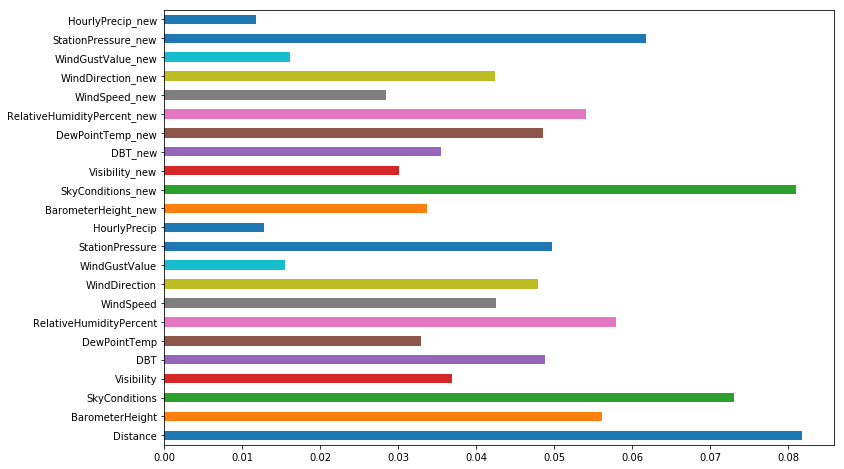

In [50]:
#Adaboost:
importances=pd.Series(Adaboost_model.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))

In [41]:
test_pred_1= Adaboost_model.predict(final_flight_test.as_matrix())
sample = pd.read_csv('flightdelay_samplesubmission-1550836789630.csv')
sub = pd.DataFrame()
sub['FlightNumber'] = sample.FlightNumber
sub['FlightDelayStatus'] = test_pred_1
sub.to_csv('ali4.csv')

C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
##Grid Search:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,150,200], 'learning_rate' : [0.1,0.5,0.9]}
clf = GridSearchCV(AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=4)
clf.fit(X=X_train_sm, y=y_train_sm)
ada_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8389423076923077 {'learning_rate': 0.5, 'n_estimators': 150}


In [47]:
print("Train accuracy is ",accuracy_score(y_train_sm,ada_model.predict(X_train_sm)))
print("Test accuracy is",accuracy_score(y_test,ada_model.predict(X_test.as_matrix())))


print("Train accuracy is ",classification_report(y_train_sm,ada_model.predict(X_train_sm)))
print("Test accuracy is",classification_report(y_test,ada_model.predict(X_test.as_matrix())))

Train accuracy is  0.9209866220735786
Test accuracy is 0.8136456211812627


C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Train accuracy is                precision    recall  f1-score   support

           1       0.95      0.89      0.92      4784
           2       0.90      0.95      0.92      4784

   micro avg       0.92      0.92      0.92      9568
   macro avg       0.92      0.92      0.92      9568
weighted avg       0.92      0.92      0.92      9568

Test accuracy is               precision    recall  f1-score   support

           1       0.57      0.43      0.49       406
           2       0.86      0.91      0.89      1558

   micro avg       0.81      0.81      0.81      1964
   macro avg       0.71      0.67      0.69      1964
weighted avg       0.80      0.81      0.80      1964



C:\Users\Ibney naseem\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


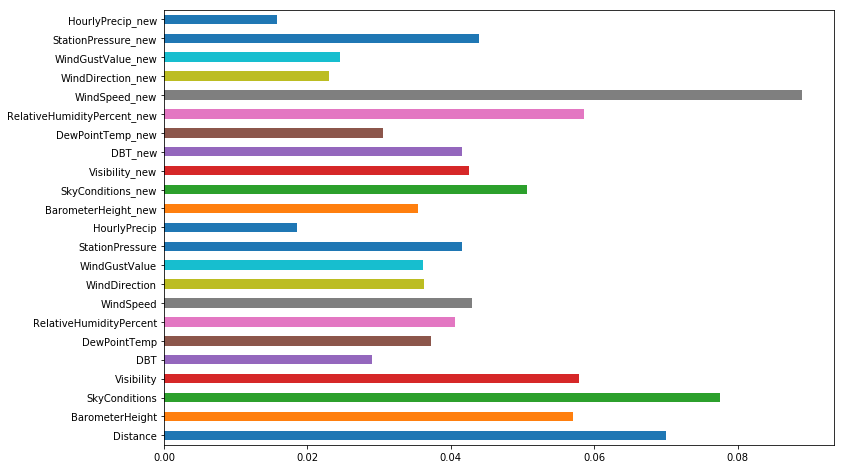

In [51]:
#XG Boost:
importances=pd.Series(ada_model.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))

# Summary & Conclusion />

# Summary:

In this project I have used Ensembles Tehniques to Predict Flight Prediction Analysis with three important data given i.e Weather Hourly Data, Weather Hpd Data and All Stations Data.

# Conclusion:

# Important Features:

On studying the Prediction of Flight Analysis pattern using multiple techniques, I concluded that the following features play a major role in predicting the Flight Analysis.

-> Visibility

-> Sky Conditions

-> Distance

-> Wind Speed

-> Station Pressure

-> Relative Humidity Percentage

# Model Performance:

XG Boost model gave best performance when used with Flight Analysis data and merging additional Attributes. F1 Score turned out to be 0.46.

# Models Used:

I used XG Boost with Hyperparameter Tuning and it gave me 0.46 score in SCT.

I also used Adaboost and it gave me 0.44 Score in SCT.

I also used Gradient Boosting Method with Grid Search but it didnt gave me that good Score

# Thanks for your Precious Time & Regards!